### Model Training

#### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor    
import warnings

#### Import Dataset

In [2]:
df = pd.read_csv('Data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
y = df['math score']
X = df.drop(['math score'], axis = 1)

In [5]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

#### Separating numerical and categorical columns

In [7]:
num_cols = X.select_dtypes(exclude = 'O').columns
cat_cols = X.select_dtypes(include = 'O').columns

#### Column Transformer

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ss = StandardScaler()
ohe = OneHotEncoder()

preprocessor = ColumnTransformer([
    ('OneHotEncoder', ohe, cat_cols),
    ('StandardScalar', ss, num_cols)
])

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Evaluate Model

In [11]:
def evaluate(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mse, mae, r2

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    mse_train, mae_train, r2_train = evaluate(y_train, y_train_pred)
    mse_test, mae_test, r2_test = evaluate(y_test, y_test_pred)

    print('Training Performance:')
    print(' -> Mean Squared Error: ', round(mse_train, 3))
    print(' -> Mean Absloute Error: ', round(mae_train, 3))
    print(' -> r2_score: ', round(r2_train, 3))
    print('-'*30)

    print('Test Performance:')
    print(' -> Mean Squared Error: ', round(mse_test, 3))
    print(' -> Mean Absloute Error: ', round(mae_test, 3))
    print(' -> r2_score: ', round(r2_test, 3))
    print('-'*30)
    r2_list.append(r2_test)

    print('*'*35)

Linear Regression
Training Performance:
 -> Mean Squared Error:  28.335
 -> Mean Absloute Error:  4.267
 -> r2_score:  0.874
------------------------------
Test Performance:
 -> Mean Squared Error:  29.095
 -> Mean Absloute Error:  4.215
 -> r2_score:  0.88
------------------------------
***********************************
Lasso
Training Performance:
 -> Mean Squared Error:  43.478
 -> Mean Absloute Error:  5.206
 -> r2_score:  0.807
------------------------------
Test Performance:
 -> Mean Squared Error:  42.506
 -> Mean Absloute Error:  5.158
 -> r2_score:  0.825
------------------------------
***********************************
Ridge
Training Performance:
 -> Mean Squared Error:  28.338
 -> Mean Absloute Error:  4.265
 -> r2_score:  0.874
------------------------------
Test Performance:
 -> Mean Squared Error:  29.056
 -> Mean Absloute Error:  4.211
 -> r2_score:  0.881
------------------------------
***********************************
K-Neighbors Regressor
Training Performance:
 ->

In [13]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Name', 'R2_Score']).sort_values(by = ['R2_Score'], ascending = False)

,Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.849267
8,AdaBoost Regressor,0.845152
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.784030
4,Decision Tree,0.760149


#### Linear Regression

In [14]:
lr = LinearRegression(fit_intercept = True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print('Accuracy Score: ', score)

Accuracy Score:  88.04332983749565


#### Plotting True v/s Predicted graph

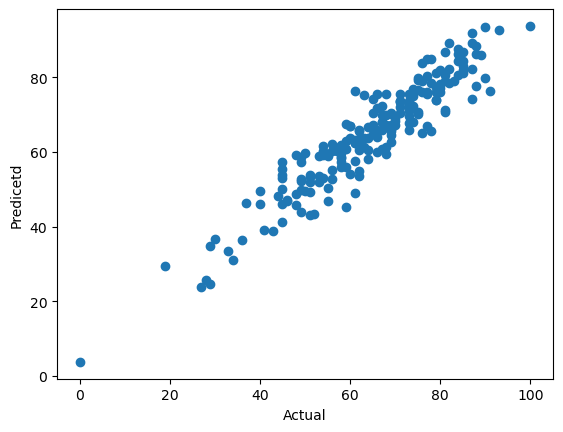

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicetd')
plt.show()

<Axes: xlabel='math score'>

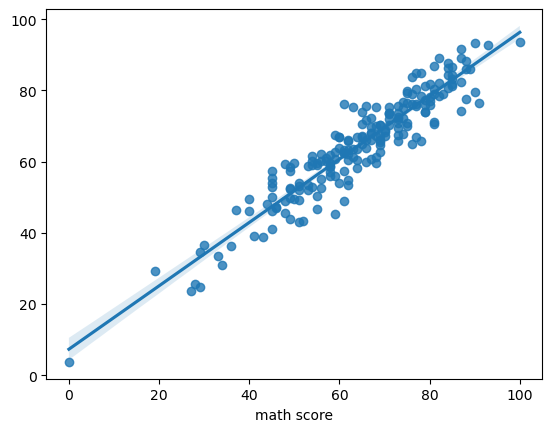

In [16]:
sns.regplot(x = y_test, y = y_pred)

#### Difference Between Actual and predicted values

In [17]:
pred_diff = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': (y_test - y_pred)})
pred_diff

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
